In [8]:
# !pip install lifelines
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import linear_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import seaborn as sns
from datetime import datetime
import scipy.stats
from datetime import datetime


In [9]:
# Clean Dataset
    
#import the data for python
LOCAL_PATH = r'C:\Users\tom3r\Downloads/data_GCCR003all_clean_final.csv'
PLATFORM_PATH = r'INSERT HERE YOUR PATH'
try:
    data = pd.read_csv(LOCAL_PATH,encoding= 'unicode_escape')
except:
    data = pd.read_csv(PLATFORM_PATH,encoding= 'unicode_escape')
    
    
# Rename for convenience
data.rename(columns={'Unnamed: 0':'id'}, inplace=True)
data.rename(columns={ data.columns[11]: "Respiratory_Illness_yn" }, inplace = True)

In [10]:
strict = data.query('COVID_diagnosis_strict == 1')

In [11]:
# model = LinearRegression()
X = np.array(data.SurveyTimeLapse).transpose()
# y = data['COVID_diagnosis_strict'].reshape(1,-1)
# y = np.array(data['Taste_current'] - data['Taste_before_illness'])
y = np.array(strict['Smell_current']/strict['Smell_before_illness']) - (strict['Taste_during_illness']/strict['Taste_before_illness'])

In [12]:
# data = pd.read_csv('data.csv')  # load data set
X = np.array(strict.SurveyTimeLapse).reshape(-1, 1)  # values converts it into a numpy array
# Y = np.array(strict['Smell_before_illness'] - strict['Smell_current']).reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
Y = np.array((strict['Smell_before_illness']/strict['Smell_before_illness']) - (strict['Smell_current']/strict['Smell_before_illness'])
)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

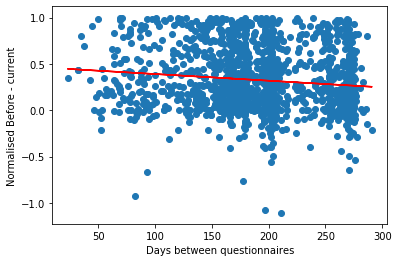

In [13]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.ylabel("Normalised Before - current")
plt.xlabel("Days between questionnaires")
plt.show()


Text(0.5, 0, 'Days between questionnaires ')

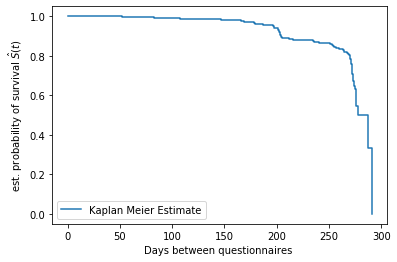

In [14]:
# from lifelines.plotting import lifelines
from lifelines import KaplanMeierFitter

## Example Data 
durations = strict.SurveyTimeLapse
# event_observed = strict['Smell_current'] - strict['Smell_before_illness']
event_observed =(strict['Smell_current']/strict['Smell_before_illness']) - (strict['Smell_during_illness']/strict['Smell_before_illness'])
plt.show()
# event_observed = strict['Smell_current'] - strict['Smell_before_illness']

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate

kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("Days between questionnaires ")


In [15]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.537
Model:                            OLS   Adj. R-squared (uncentered):              0.537
Method:                 Least Squares   F-statistic:                              1870.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):                   8.00e-272
Time:                        17:56:38   Log-Likelihood:                         -906.70
No. Observations:                1613   AIC:                                      1815.
Df Residuals:                    1612   BIC:                                      1821.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0023   5.26e-05     43.238      0.000       0.002       0.002
==============================================================================
Omnibus:                       45.613   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.886
Skew:                          -0.411   Prob(JB):                     2.42e-11
Kurtosis:                       3.230   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""